In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
!ls -l ../../../Data/Weather/

total 1035296
-rw-r--r--  1 yoavfreund  staff   81745122 Apr 20 16:10 STAT.pickle
-rw-r--r--  1 yoavfreund  staff  417856543 Apr 20 16:11 SampleStations.pickle
-rw-r--r--  1 yoavfreund  staff    1443406 Apr 15 20:32 US_counts.pickle
-rw-r--r--  1 yoavfreund  staff        218 Apr 13 16:38 data-source.txt
-rw-r--r--  1 yoavfreund  staff      22422 Apr 13 16:38 ghcnd-readme.txt
-rw-r--r--  1 yoavfreund  staff    7334424 Apr 13 16:38 ghcnd-stations.txt
-rw-r--r--  1 yoavfreund  staff    7760844 Apr 13 16:38 ghcnd-stations_buffered.txt
-rw-r--r--  1 yoavfreund  staff        270 Apr 13 16:38 ghcnd-version.txt
-rw-r--r--  1 yoavfreund  staff   13888914 Apr 13 16:59 stations.pkl


In [13]:
import pickle
STAT,STAT_description=pickle.load(open('../../../Data/Weather/STAT.pickle','r'))

In [15]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [17]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [23]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas ../../../Data/Weather/ghcnd-readme.txt
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-244.000000 low100:-244.000000 high100:239.000000 high1000:272.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-178.000000 low100:-178.000000 high100:339.000000 high1000:394.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-122.000000 low100:-122.000000 high100:383.000000 high1000:428.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:64.000000 high1000:203.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:483.000000 high1000:1448.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:371.000000 high1000:864.000000


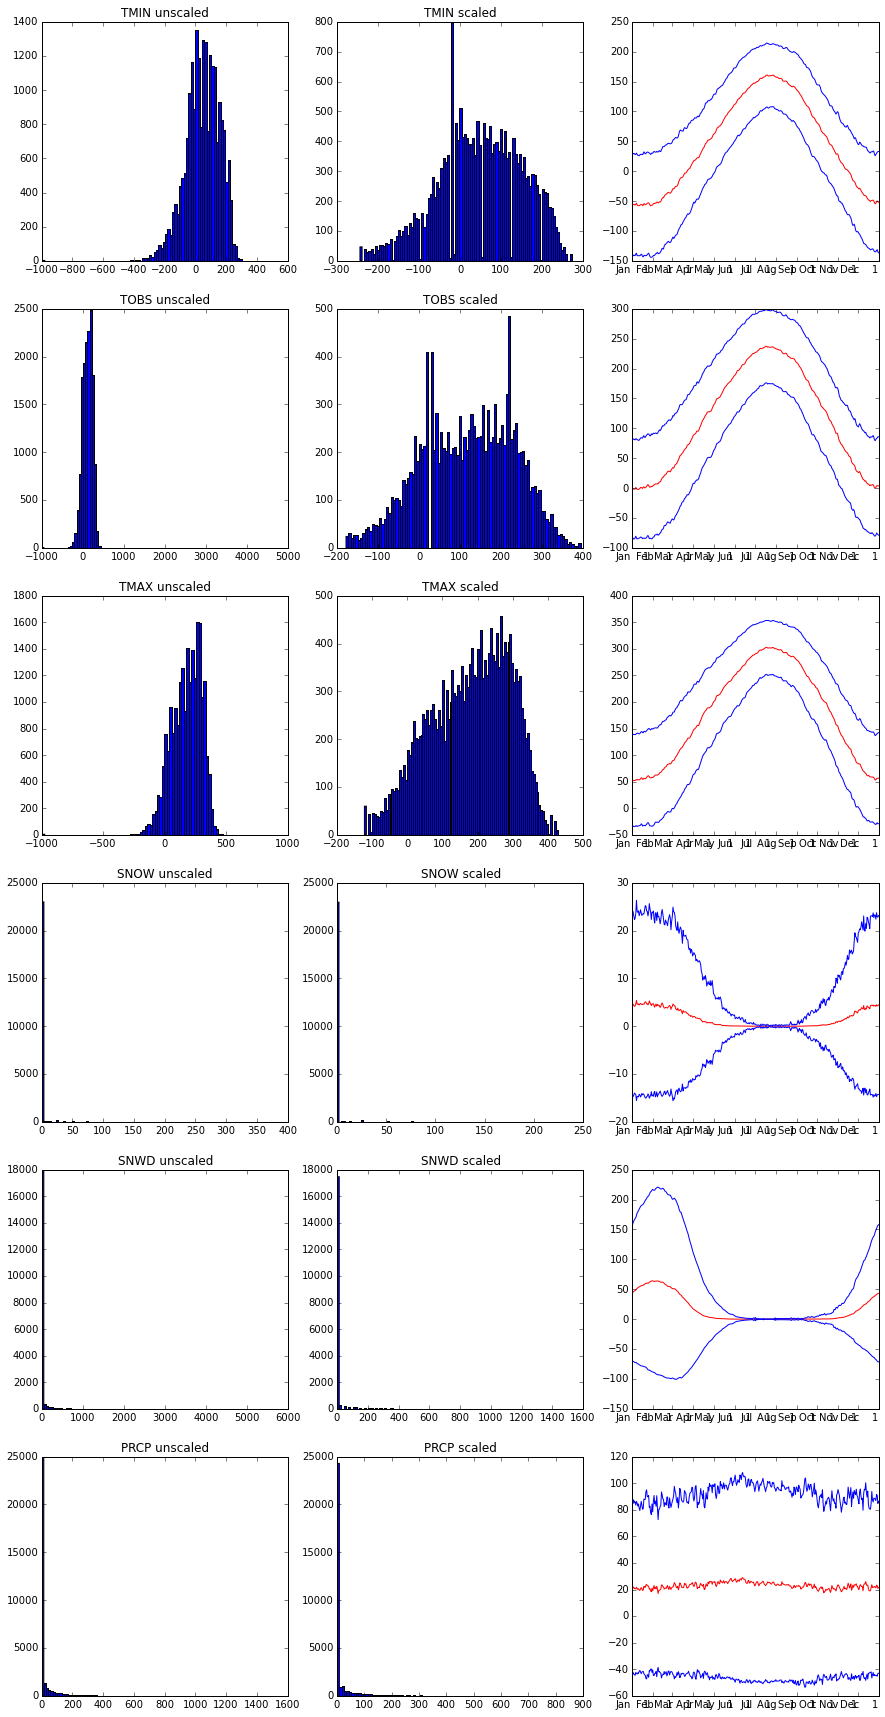

In [74]:
figure(figsize=(15,30))
offset=0
for meas in STAT.keys():
    Vals=STAT[meas]['SortedVals']
    subplot(6,3,offset+1)
    hist(Vals,bins=100)
    title(meas+' unscaled')
    low1000 = STAT[meas]['low1000']
    high1000 = STAT[meas]['high1000']
    Restricted_Vals=[v for v in Vals if v>=low1000 and v<=high1000]
    subplot(6,3,offset+2)
    title(meas+' scaled')
    hist(Restricted_Vals,bins=100);
    fig = subplot(6,3,offset+3)
    Mean = STAT[meas]['Mean']
    Std = sqrt(STAT[meas]['Var'])
    YearlyPlot(fig,Mean,'R')
    YearlyPlot(fig,Mean-Std,'b')
    YearlyPlot(fig,Mean+Std,'b')
    
    offset+=3

In [69]:
from datetime import date
dates=[date.fromordinal(i) for i in range(1,366)]
def YearlyPlot(fig,Y,color='k',Label=None):
    if len(Y) != 365:
        raise ValueError("First dimension of T should be 365. Shape(Y)="+len(Y))
    plot(dates,Y,color,label=Label);
    # rotate and align the tick labels so they look better
    # fig.autofmt_xdate()

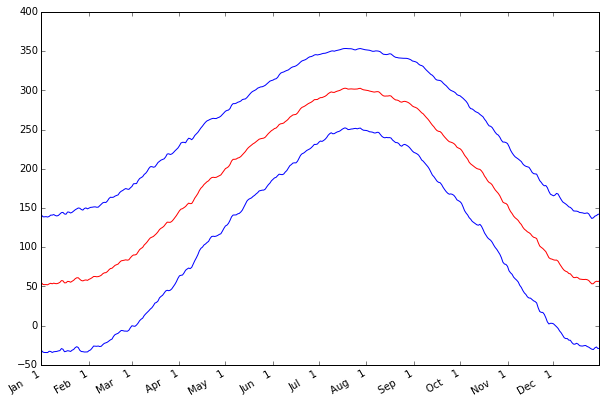

In [67]:
Mean = STAT[meas]['Mean']
Std = sqrt(STAT[meas]['Var'])
fig=figure(1,figsize=(10,7))
YearlyPlot(fig,Mean,'R')
YearlyPlot(fig,Mean-Std,'b')
YearlyPlot(fig,Mean+Std,'b')
